# torchviz

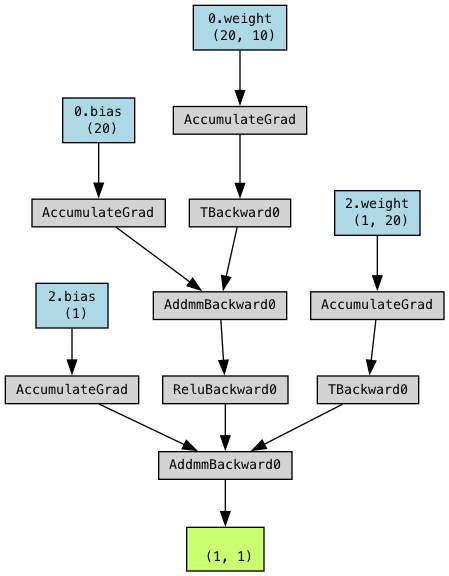

In [1]:
import torch
import torch.nn as nn
from torchviz import make_dot
from IPython.display import Image

# 定义一个简单的模型
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

# 创建输入
x = torch.randn(1, 10)

# 前向传播
y = model(x)

# 绘制计算图

# 生成并显示计算图
dot = make_dot(y, params=dict(model.named_parameters()))
dot.format = 'png'  # 设置输出格式
display(Image(dot.pipe()))  # 直接显示图像

# stride

In [9]:
a = torch.arange(4).view(2, 2)
print("\nstride:")
print(a.stride())
print("\nstorage:")
print(a.storage())
print("\na:")
print(a)

a[1, 0]


stride:
(2, 1)

storage:
 0
 1
 2
 3
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 4]

a:
tensor([[0, 1],
        [2, 3]])


/var/folders/x_/rc0r683d1591flchvhcl69140000gn/T/ipykernel_19389/1850928135.py:5: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(a.storage())


tensor(2)

In [10]:
b = torch.arange(12).view(3, 4)
print("\nstride:")
print(b.stride())
print("\nstorage:")
print(b.storage())
print("\nb:")
print(b)

idx = (2, 2)
print(b[idx])

loc = sum([i * s for i, s in zip(idx, b.stride())])
print(b.storage()[loc])
b.storage()[loc] = 100
print(b)


stride:
(4, 1)

storage:
 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 12]

b:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor(10)
10
tensor([[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9, 100,  11]])


如果是不连续的情况？

In [11]:
b = torch.arange(12).view(3, 4)
print(b)
c = b[:, 2:4]
print(c)
print(c.shape)
print("stride:")
print(c.stride())
print("storage:")
print(c.storage())
print("storage offset:")
print(c.storage_offset())
idx = (2, 1)
print(c[idx])
loc = c.storage_offset() + c.stride()[0] * idx[0] + c.stride()[1] * idx[1]
print("storage location:")
print(loc)
print("storage value:")
print(c.storage()[loc])

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 2,  3],
        [ 6,  7],
        [10, 11]])
torch.Size([3, 2])
stride:
(4, 1)
storage:
 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 12]
storage offset:
2
tensor(11)
storage location:
11
storage value:
11


# repeat & expand
expand 共用存储

In [8]:
a = torch.arange(5).view(1, 5)
a = a.expand(5, -1)
print("a:", a)
print("stride:", a.stride())
print("storage_offset:", a.storage_offset())
print("storage:", a.storage())
idx = (4, 2)
print("a[idx]:", a[idx])
loc = a.storage_offset() + a.stride()[0] * idx[0] + a.stride()[1] * idx[1]
print("loc:", loc, ", value:", a.storage()[loc])

a: tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])
stride: (0, 1)
storage_offset: 0
storage:  0
 1
 2
 3
 4
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 5]
a[idx]: tensor(2)
loc: 2 , value: 2


In [9]:
a = torch.arange(3).view(1, 3)
a = a.repeat(3, 1)
print("a:", a)
print("stride:", a.stride())
print("storage:", a.storage())

a: tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])
stride: (3, 1)
storage:  0
 1
 2
 0
 1
 2
 0
 1
 2
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 9]


# `1::2`
奇数 index，偶数 index

In [14]:
import torch
e = torch.randn(1, 4, 1)
a = e[:, ::2, :]
b = e[:, 1::2, :]
print(a.shape, b.shape)
print(e, "\n", a, "\n", b)
explicit = torch.cat([a, b], dim=1)
print(explicit.shape)

torch.Size([1, 2, 1]) torch.Size([1, 2, 1])
tensor([[[ 0.3415],
         [ 0.2869],
         [-0.3521],
         [ 0.4799]]]) 
 tensor([[[ 0.3415],
         [-0.3521]]]) 
 tensor([[[0.2869],
         [0.4799]]])
torch.Size([1, 4, 1])


### `cross_entropy`

In [17]:
import torch
import torch.nn.functional as F
logits = torch.tensor([-3.2498, -0.0190,  0.4600, -0.0159,  0.2664, -1.5088, -0.0357,  1.4905,
                       0.2222,  0.2434,  1.8196,  5.5226, -1.8668,  1.2035, -1.0322,  0.5546,
                       0.8345,  0.2406, -1.9352,  0.1758, -0.8442, -0.5403, -0.9409,  0.0991,
                       -0.1012, -0.5036,  0.3125]).view(1, 27)
y = torch.tensor([11])
print(logits.shape, y.shape)
probs = F.softmax(logits, dim=-1)
print(probs)
loss = F.cross_entropy(logits, y)
print(probs[0, y[0]])
print(loss)

-torch.log(probs[0, y[0]])

torch.Size([1, 27]) torch.Size([1])
tensor([[1.3590e-04, 3.4382e-03, 5.5508e-03, 3.4489e-03, 4.5738e-03, 7.7503e-04,
         3.3813e-03, 1.5556e-02, 4.3761e-03, 4.4698e-03, 2.1618e-02, 8.7704e-01,
         5.4180e-04, 1.1675e-02, 1.2483e-03, 6.1016e-03, 8.0724e-03, 4.4573e-03,
         5.0598e-04, 4.1776e-03, 1.5064e-03, 2.0414e-03, 1.3676e-03, 3.8692e-03,
         3.1669e-03, 2.1177e-03, 4.7896e-03]])
tensor(0.8770)
tensor(0.1312)


tensor(0.1312)

### Linear 是行向量矩阵乘法

In [10]:
import torch
from torch import nn
B, T, C, H = 2, 3, 4, 5

x = torch.randn(B, T, C)
print(x.shape)
w = nn.Linear(C, H, bias=False)

w2 = torch.rand(C, H)
w.weight = nn.Parameter(w2.T)
print(w.weight.shape)
print(w(x).shape)
print(w2.shape)
print((x @ w2).shape)
print(w(x) == x @ w2)

torch.Size([2, 3, 4])
torch.Size([5, 4])
torch.Size([2, 3, 5])
torch.Size([4, 5])
torch.Size([2, 3, 5])
tensor([[[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]])


# ReduceLROnPlateau
连续 N 次之后衰减学习率

In [4]:
import torch
from torch import nn
model = nn.Linear(100, 100)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

In [5]:
test_losses = [6, 5, 6, 7, 8, 5, 4, 3, 4, 5, 6, 7]
for test_loss in test_losses:
    scheduler.step(test_loss)
    print(test_loss, f"   { scheduler.get_last_lr()[0]:.6f}")

6    0.001000
5    0.001000
6    0.001000
7    0.001000
8    0.000500
5    0.000500
4    0.000500
3    0.000500
4    0.000500
5    0.000500
6    0.000250
7    0.000250


# topk

In [5]:
import torch
import torch.nn.functional as F

# 假设词表大小是 10000，包含了所有可能的词
vocab_size = 10000
logits = torch.randn(1, vocab_size)  # 模型输出

# 假设我们只取 top_k = 5 个最可能的词
top_k = 5

# 获取 top-5 的值和它们在词表中的索引
topk_logits, topk_indices = torch.topk(logits, k=top_k)
print("在词表中的位置:", topk_indices)
# 可能输出: [8721, 2341, 9012, 1234, 5678] - 这些是在词表中的实际位置

# 对这5个词计算概率分布
probs = F.softmax(topk_logits, dim=-1)

# multinomial 在这5个词中采样，返回的是 0-4 之间的索引
next_token_idx = torch.multinomial(probs, num_samples=1)
print("在 top-5 中的位置:", next_token_idx)
# 可能输出: [2] - 表示选中了第3个词

# 使用 gather 找回在词表中的实际位置
next_token = torch.gather(topk_indices, 1, next_token_idx)
print("在词表中的实际位置:", next_token)
# 输出: [9012] - 这才是我们真正要用的词的索引

在词表中的位置: tensor([[6899, 8127, 5165, 1184, 3849]])
在 top-5 中的位置: tensor([[1]])
在词表中的实际位置: tensor([[8127]])
